## Линейная модели, градиентный спуск и метрики

**Линейная регрессия** — модель зависимости переменной от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Ниже на графике представлена линейная регрессия переменной $y$ от переменной $x$.

Есть коэффициент наклона $a$ и есть коэффициент сдвига $b$.

Эти значения могут изменяться как угодно.

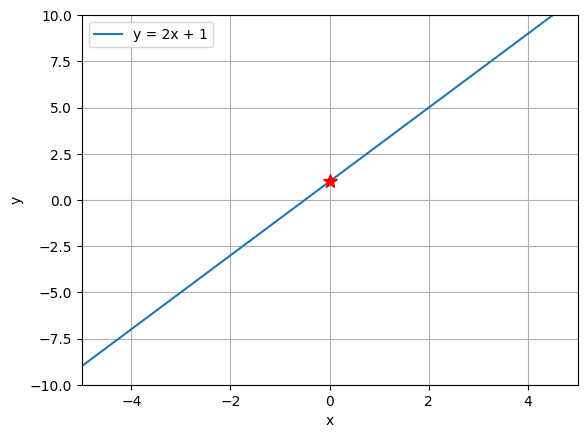

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6)
a = 2
b = 1

y = a * x + b
plt.plot(x, y, label=f'y = {a}x + {b}')
plt.plot([0], [b], 'r*', markersize=10)
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-10, 10);plt.xlim(-5, 5)
plt.grid()
plt.legend();

In [2]:
def draw_ax(a, b, x, ax, ylim=5):
    y = a * x + b
    ax.plot(x, y, label=f'y = {a}x + {b}')
    ax.plot([0], [b], 'r*', markersize=10)
    
    ax.plot([0, 1], [b, b], 'y', linewidth=2)
    ax.plot([1, 1], [b, b+a], 'y', linewidth=2)

    ax.set_ylabel('y'); ax.set_xlabel('x')
    ax.set_ylim(-ylim, ylim); ax.set_xlim(-5, 5)
    ax.grid()
    ax.legend(prop={'size': 10})

**Сдвиг**:
- Если у нас не будет сдвига (коэффициента $b$), то линяя будет проходить через точку (0, 0).
- Если коэффициент сдвига не равен 0, а к примеру, равен 2, то линяя будет проходить через точку (0, 2).

**Коэффициент наклона**:
- Если у нас не будет коэффициента наклона, то линяя будет параллельна оси Ох.
- Если коэффициент наклона больше 0, то линяя идет на увеличение, при этом чем больше коэффициент, тем более наклон крутой.
- Если коэффициент наклона меньше 0, то линяя идет на уменьшение, при этом чем меньше коэффициент, тем более наклон крутой.



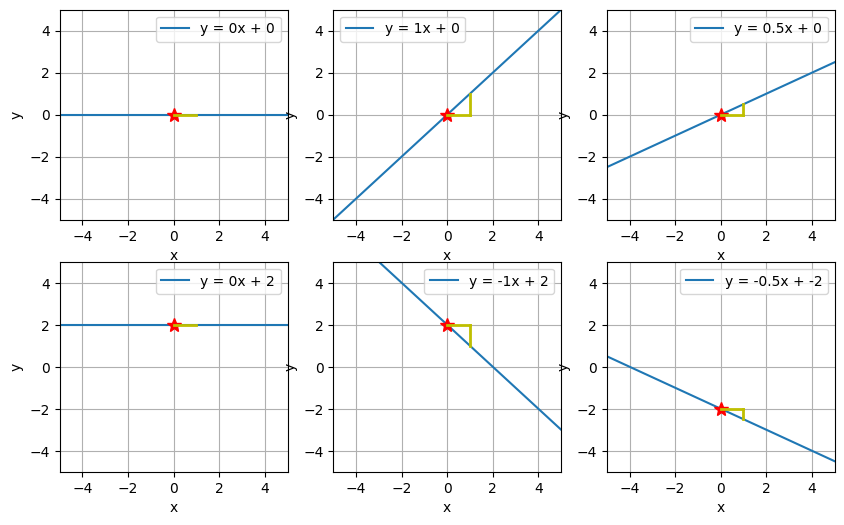

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 3, figsize=(10, 6))
x = np.arange(-6, 6)

# 1row, 1column
a, b = 0, 0
draw_ax(a, b, x, ax[0][0])

# 1row, 2column
a, b = 1, 0
draw_ax(a, b, x, ax[0][1])

# 1row, 3column
a, b = 0.5, 0
draw_ax(a, b, x, ax[0][2])


# 2row, 1column
a, b = 0, 2
draw_ax(a, b, x, ax[1][0])

# 2row, 2column
a, b = -1, 2
draw_ax(a, b, x, ax[1][1])

# 2row, 3column
a, b = -0.5, -2
draw_ax(a, b, x, ax[1][2])

С самим уравнением прямой разобрались, теперь давайте обучим линейную регрессию, ведь по факту она и есть прямая.

## Получение данных

Возьмем и сами нагенирируем себе данные и обучим на них линейную модель.

In [4]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

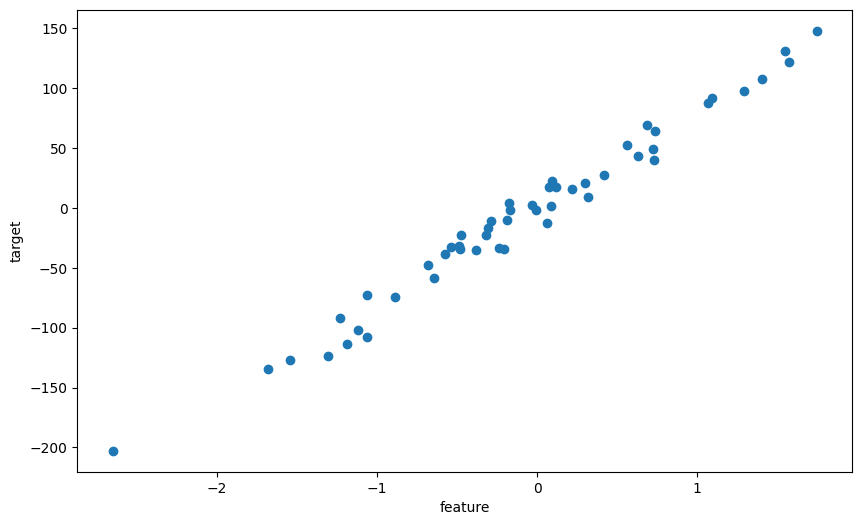

In [5]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

## Одномерная линейная регрессия

#### Из sklearn

Возьмем модель `LinearRegression` из `sklearn` из модуля `linear_model`.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

И передадим в неё в метод `fit` данные, которые получили выше.

In [7]:
model.fit(X, y)

LinearRegression()

Всё, модель обучилась, это происходит очень быстро. Обучение линейной модели заключается в поиске коэффициентов, конкретно в нашей задаче - это коэффициент сдвига и наклона.

Можем эти коэффициента отобразить, если возьмем у модели атрибут `coef_` и `intercept_`.

In [8]:
model.coef_, model.intercept_

(array([80.41862354]), 0.18171887542100862)

Вот и получили два коэффициента, осталось их подставить в уравнение прямой и будет готовая линейная модель.

In [9]:
model_a = model.coef_[0]
model_b = model.intercept_

Данная прямая наилучшим образом прошла вдоль точек из обучающей выборки.

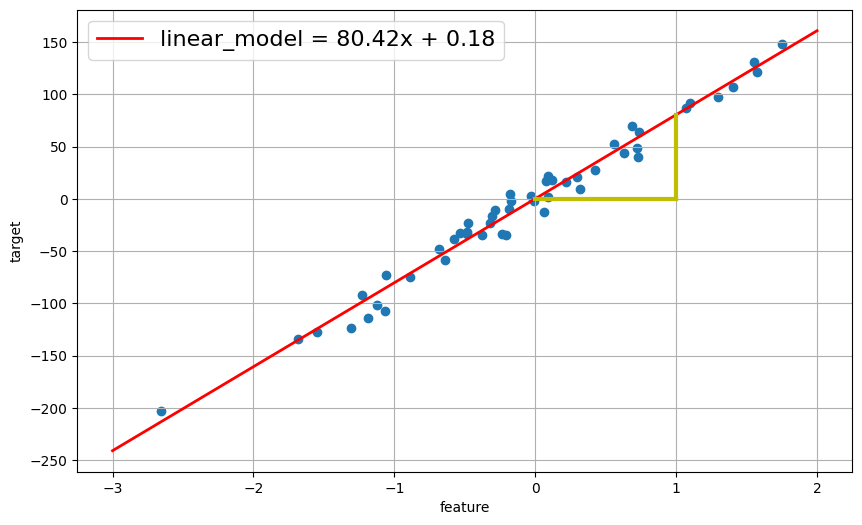

In [10]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y) 
plt.plot([0, 1], [model_b, model_b], 'y', linewidth=3)
plt.plot([1, 1], [model_b, model_b+model_a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

Чтобы теперь сделать предсказания этой моделью достаточно вызвать метод `predict` и передать в него данные.

In [11]:
pred = model.predict(X[:1])

X[:1], pred

(array([[0.63007982]]), array([50.85187092]))

Или же можем можем сделать точно такое же предсказание, если возьмем коэффициент наклона и умножим на значение признака и прибавим к этому коэффициент сдвига. 

In [12]:
model_a * X[:1] + model_b

array([[50.85187092]])

А что значит это "наилучшим образом вдоль точек из обучающей выборки"? Как подсчитался этот наилучший образ?

Чем построенная линия ниже, хуже первой?

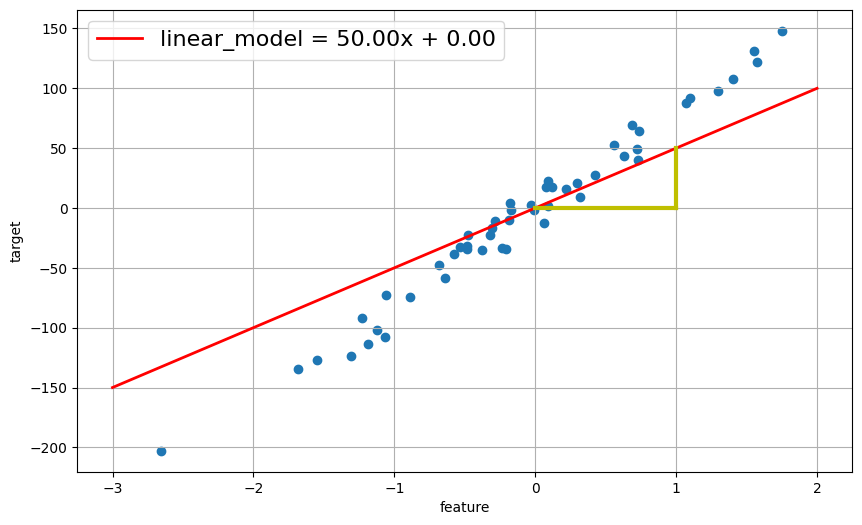

In [13]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
a, b = 50, 0
model_y = a * x + b

plt.plot(x, model_y, linewidth=2, c='r', label=f'linear_model = {a:.2f}x + {b:.2f}')
plt.scatter(X, y) 
plt.plot([0, 1], [b, b], 'y', linewidth=3)
plt.plot([1, 1], [b, b+a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

А визуально она допускает больше отклонений от синих точек, чем первая. Давайте сравним не визуально, а с помощью цифр.

Для начала составим все данные в одну таблицу:
- `X` - это точки, на которых строим модель
- `y` - это настоящая целевая переменная, которую хотим предсказать
- `pred_model_good` - это значения на линии по координатам `X` первой модели, имеем предсказания модель `LinearRegression`
- и `pred_bad_model` - это значения на линии по координатам `X` второй модели, которая создана вручную, а не силами `sklearn`

In [14]:
import pandas as pd

df = pd.DataFrame({
    'X': X[:,0],
    'y': y,
    'pred_good_model': model_a * X[:,0] + model_b,
    'pred_bad_model': a * X[:,0] + b
})


df.head()

,X,y,pred_good_model,pred_bad_model
0,0.630080,43.654341,50.851871,31.503991
1,-1.061634,-72.682350,-85.193462,-53.081722
2,0.296347,21.196446,24.013545,14.817355
3,1.402771,107.587651,112.990641,70.138556
4,0.689682,69.620632,55.645021,34.484116


Посчитаем отклонения предсказаний от истины для каждой модели.

И здесь на первых 5 объектах тоже видим, что на `sklearn` модели более маленькие отклонения, нежели на второй модели.

In [15]:
df['residual_good'] = df['pred_good_model'] - df['y']
df['residual_bad'] = df['pred_bad_model'] - df['y']
df.head()

,X,y,pred_good_model,pred_bad_model,residual_good,residual_bad
0,0.630080,43.654341,50.851871,31.503991,7.197530,-12.150350
1,-1.061634,-72.682350,-85.193462,-53.081722,-12.511112,19.600628
2,0.296347,21.196446,24.013545,14.817355,2.817099,-6.379091
3,1.402771,107.587651,112.990641,70.138556,5.402991,-37.449095
4,0.689682,69.620632,55.645021,34.484116,-13.975611,-35.136517


Давайте теперь на всех объектах посчитаем метрику, которая будет позволять оценивать качество построенных линий.

Возьмем MSE - mean squared error.

MSE на sklearn модели равняется.

In [16]:
np.mean(df['residual_good'] ** 2)

111.93097544862607

А MSE на второй модели равняется:

In [17]:
np.mean(df['residual_bad'] ** 2)

873.1554374932329

В разы больше, чем на первой модели.

### Как обучается линейная регрессия

*Как же модель из `sklearn` умудрилась построить такие качественные предсказания?* Ведь у неё была куча вариантов построения, можно менять коэффициенты наклона и сдвига как угодно.

Ответ на вопрос - **методы оптимизации**.

Ведь ошибка MSE тоже своего рода функция, которая меняется от коэффициента сдвига и наклона.

Можем взять по 100 разных значений коэффициентов сдвига и наклона и посчитать в них MSE и отобразить на трехмерном графике.

Так же отобразим и коэффициента, подобранные моделью из sklearn и наши коэффициенты.

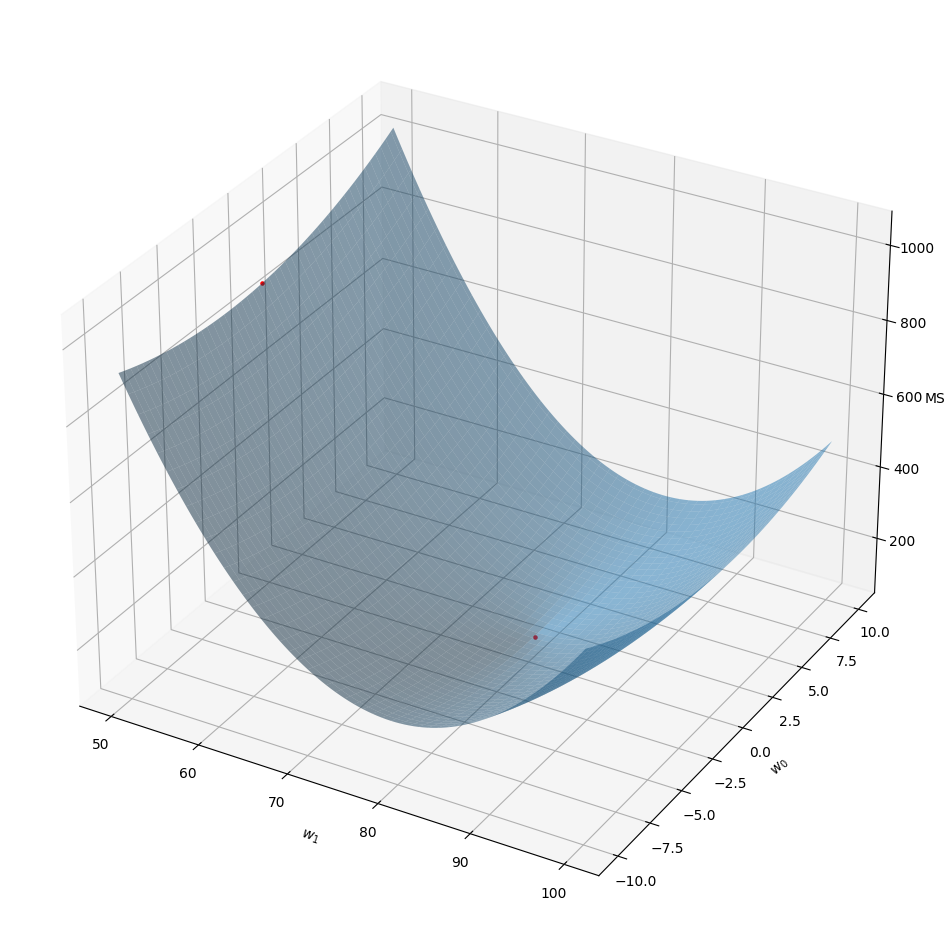

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w1, w0):
    y_pred = w1 * X[:, 0] + w0
    return np.mean((y - y_pred) ** 2)


coefs_a = np.linspace(50, 100, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, mse(model_a, model_b), c='r', s=5)
ax.scatter(a, b, mse(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('MSE')

plt.show()

И видим, что дейстивительно, модель с коэффициентом `a` равным где-то 80, и с небольшим коэффициентом `b` лучше, чем модель с коэффициентом `a=50`, ведь ошибка у второй модели выше, чем у первой.



#### Градиентный спуск

*Как модель дошла до самой лучшей точки?*

А она обучалась с помощью градиентного спуска - это метод оптимизации.

**Обсудим, что такое градиент и зачем надо спускаться.**

_Градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

К примеру, если функция зависит от трех переменных: $F(x, y, z)$, то её градиент будет равен 

$$\nabla f(x, y, z) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}) $$

При этом, __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

**Градиентный спуск** — метод нахождения локального минимума с помощью движения вдоль антиградиента.

Давайте попробуем реализовать программно градиентный спуск, чтобы лучше понять как он работает.

Зададим две функции:
1. func - функция параболы $f(x) = x^2$
2. gr_func - производная функции параболы $\nabla f(x) = 2x$

In [19]:
def func(x):
    return x ** 2

# функция градиента
def gr_func(x):
    return 2 * x

Можем отрисовать эту функцию на графике.

Действительно видим параболу.

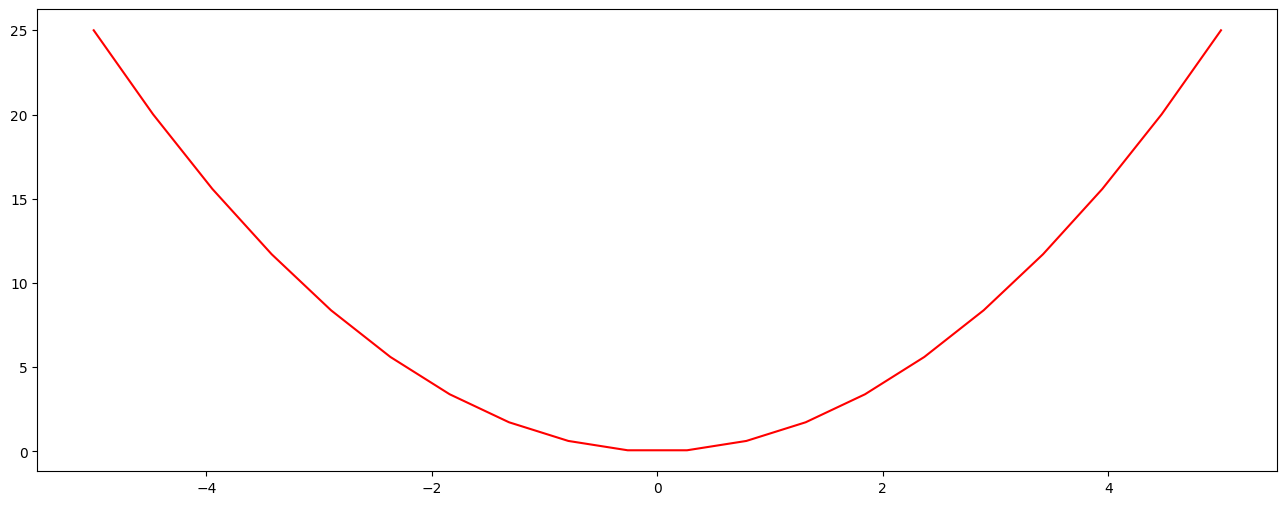

In [20]:
# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)');

Чтобы найти минимум этой функции мы можем воспользоваться методом оптимизации - градиентный спуск, для этого нужно задать начальную точку, откуда будем считать градиенты и скатываться в минимум.

Зеленая звездочка - это и есть точка старта.

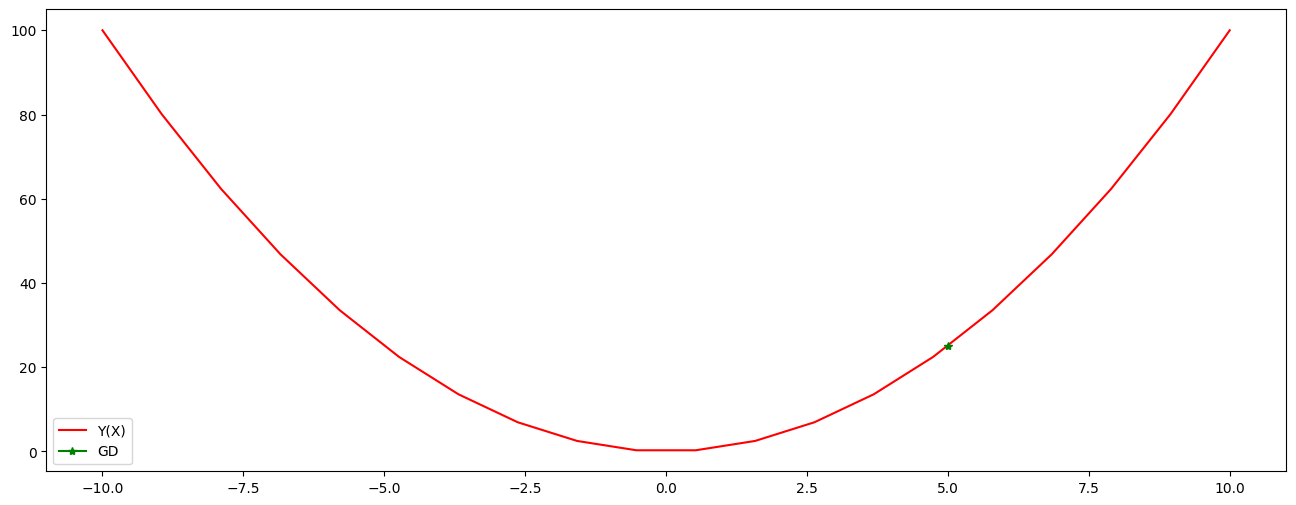

In [21]:
# первоначальное точка
start_point = 5

# для картинки
D = 10

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '-*g', label = 'GD');
plt.legend()

Теперь в этой точке можем посчитать градиент.

Он равняется 10, т.к. начальная точка равна 5, а производная будет равняться $\nabla f(x) = 2\cdot x = 2 \cdot 5 = 10$  

In [22]:
grad = gr_func(start_point)
grad

10

Можем отрисовать направление градиента, он показывает наискорейший рост функции и действительно видим, зеленый вектор идет вверх. 

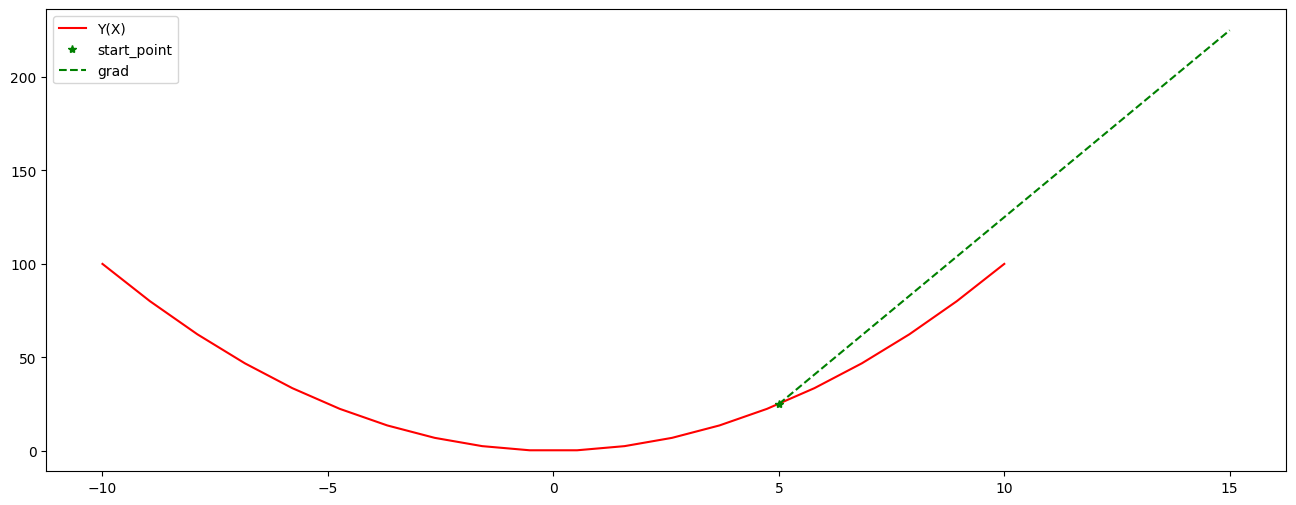

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point + grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположгном направлении, а значит брать **антиградиент**.

Но если мы пойдем от текущей точке $5$ в сторону антиградиента $-10$, то окажемся в точке $-5$, а это так же удалено от минимума, как и наша стартовая точка.

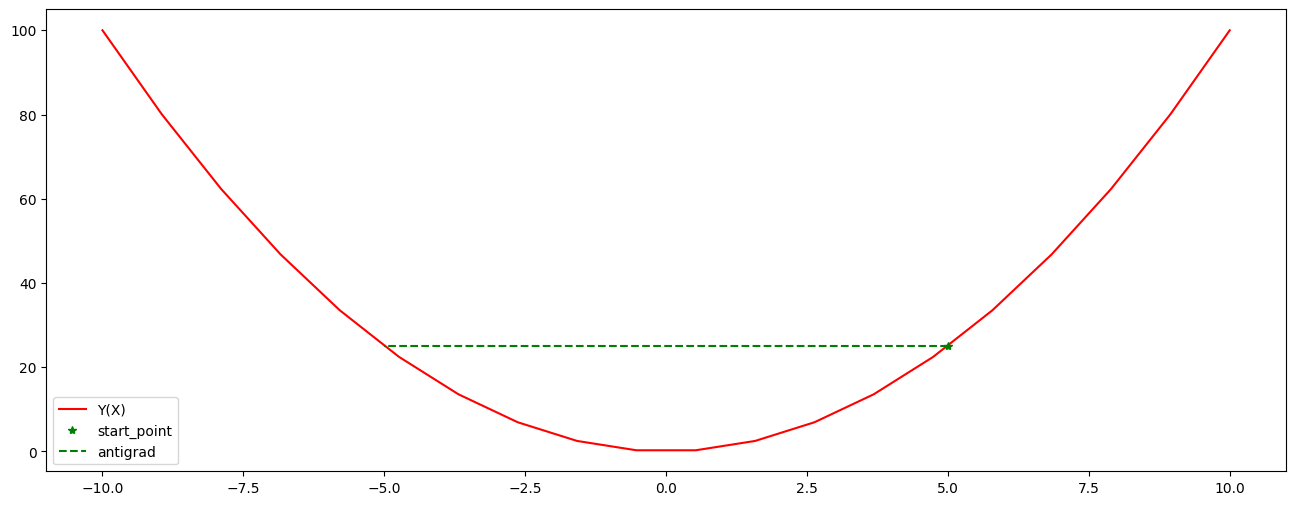

In [24]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='antigrad')
plt.legend();

Поэтому чтобы не перескакивать минимальное состояние функции мы можем делать шаг в сторону антиградиента не полностью, а только на какую-то долю, для этого нужно ввести значения **шага обучения** (скорость обучения, learning rate) - это значения, замедляющее шаги градиентного спуска, чтобы не пропустить локальный минимум. 

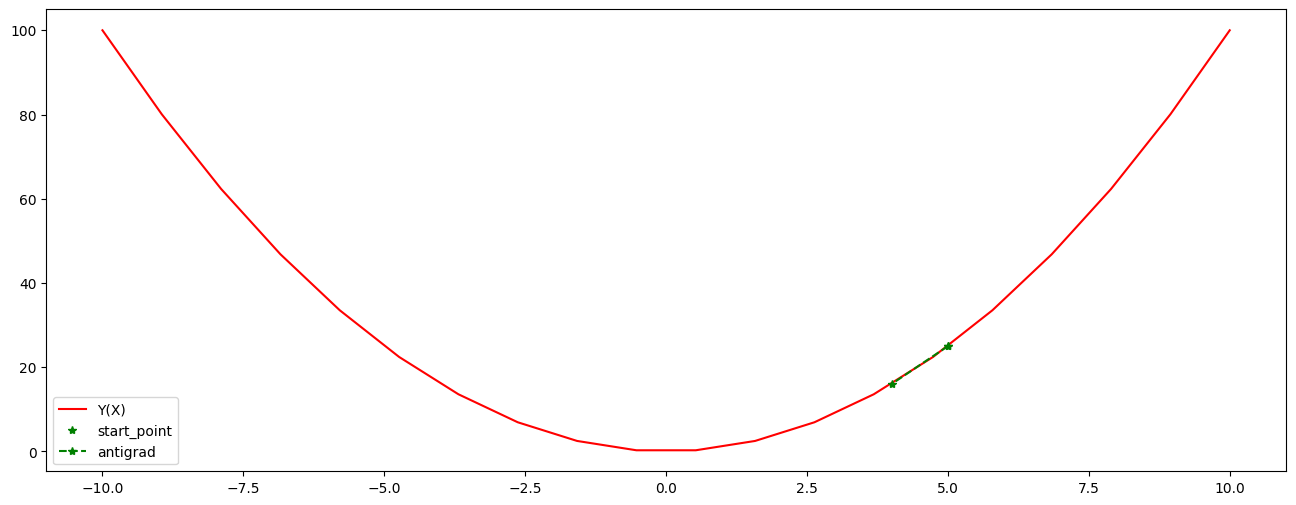

In [25]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - grad * learning_rate
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*g', label='antigrad')
plt.legend();

Вот мы и получили новую точку с координатой $x=4$. 

Теперь в этой точке можем снова рассчитать значение градиента.

In [26]:
curr_point = next_point_1
curr_point

4.0

In [27]:
grad = gr_func(curr_point)
grad

8.0

Отрисуем направление градиента, который показывает наискорейший рост функции.

А синим пометим уже пройденный шаг.

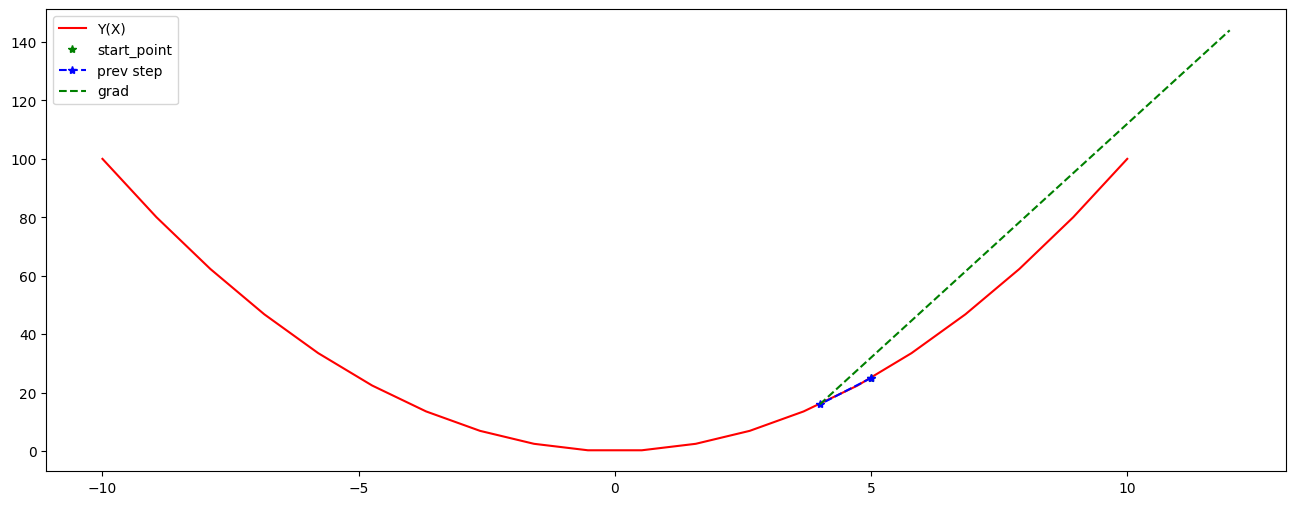

In [28]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point + grad

plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположном направлении, а значит брать **антиградиент**.

Но при этом помним, что если сходить на полный антиградиент, то можем перелететь минимум, поэтому домножим на скорость обучения.

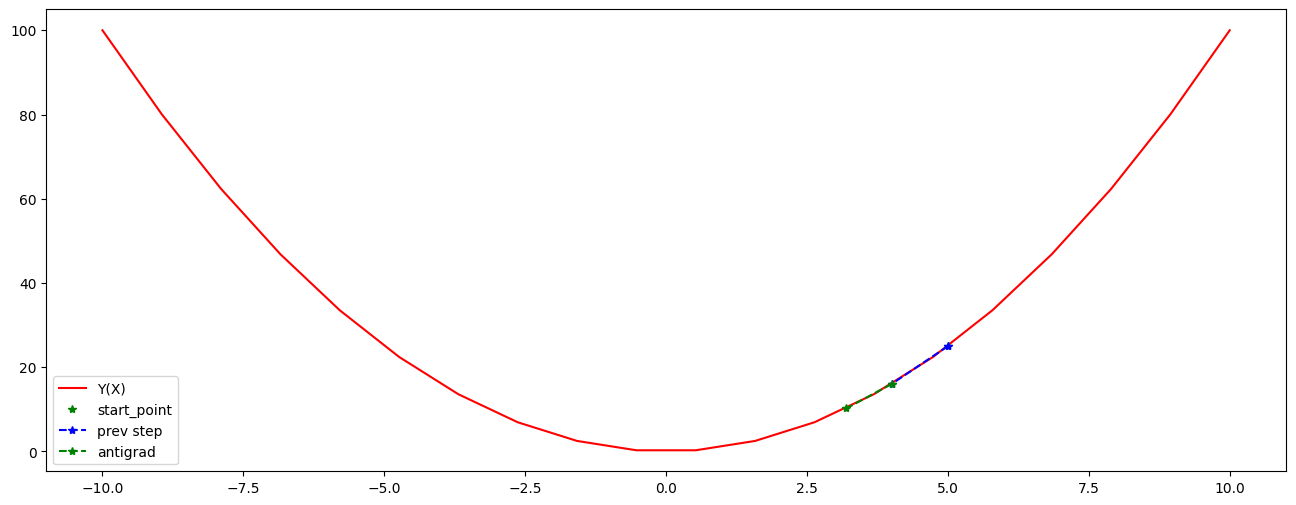

In [29]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point - learning_rate * grad
plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--*g', label='antigrad')
plt.legend();

И получаем еще одну точку, которая уже ближе к минимуму функции.

Оформим небольшой цикл для градиентного спуска.

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

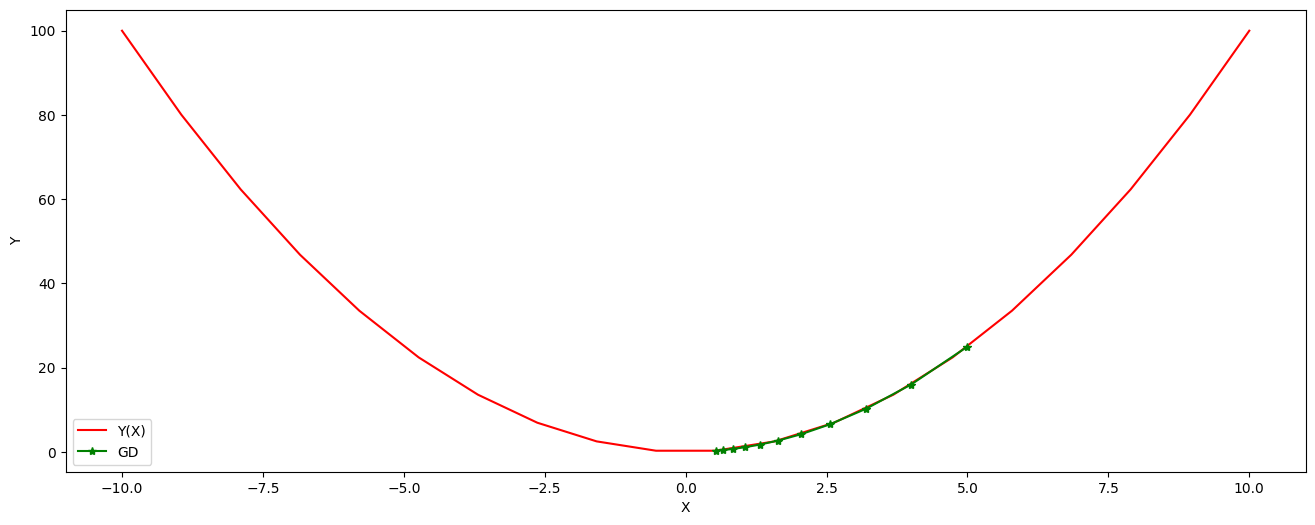

In [30]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)                                     

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Прошли 10 шагов и практически находимся в минимуме функции.

А если мы сделаем больше итераций, то наверняка алгоритм сойдется к 0.


Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

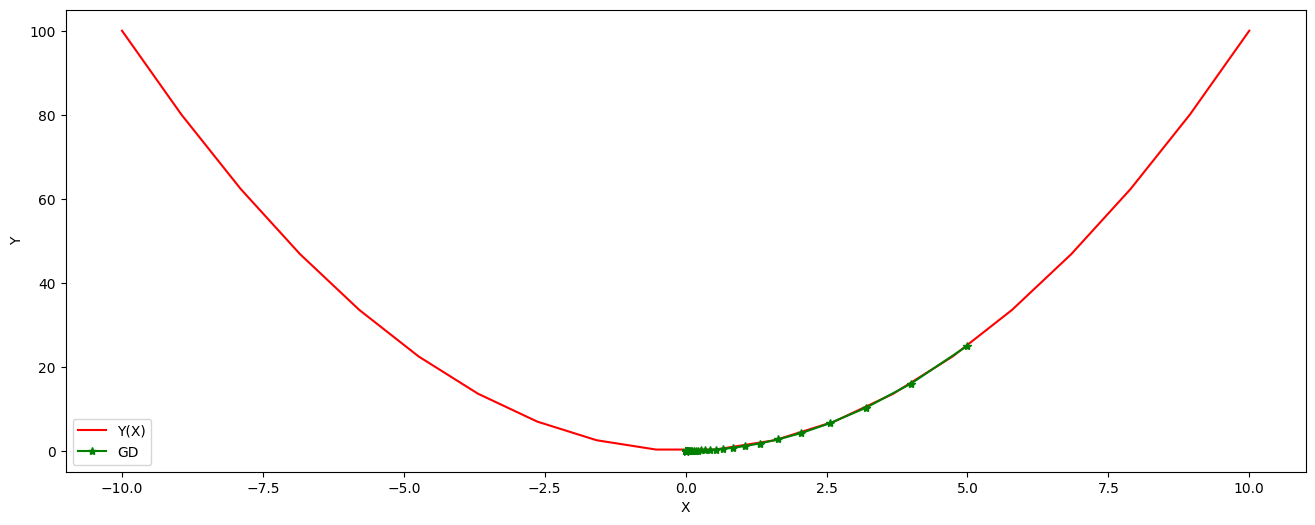

In [31]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)                                    

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Но здесь значения самой лучшей минимальной точки на последних шагах очень похожи и на самом деле мы могли не ждать столько итераций и выйти из цикла раньше.

Для этого введем значение eps, с помощью которого будем проверять разницу между текущей точкой и следующей точкой и если она меньше eps (а значит точки очень близки), то можем выйти из алгоритма.

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

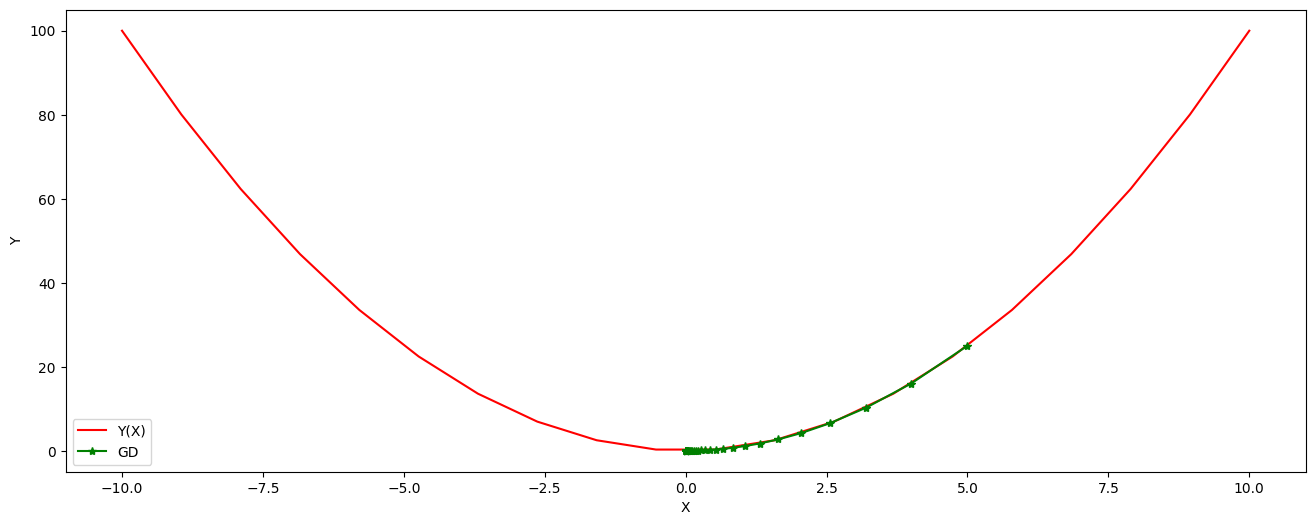

In [32]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    if(abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

И да, алгоритму понадобилось всего лишь 42 итерации, разница между двумя точками оказалась меньше `eps`, а значит можем выйти из цикла схождения алгоритма - это называется критерий останова.

#### Алгоритм градиентного спуска

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- $ w_{k} = w_{k-1} - \eta\nabla f(w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


### Своя реализация линейной регрессии


Теперь зная, как работает метод оптимизации градиентный спуск, можем вернуться к задаче обучения линейной регрессии, но уже не с помощью `sklearn`, а вручную.

Берем те же самые данные, но вдобавок еще возвращем коэффициент наклона (коэффициент сдвига по умолчанию в такой генерации равен 0).

In [33]:
X, y, coeffs = make_regression(n_samples=50, n_features=1, n_informative=1,
                               noise=10, coef=True, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

In [34]:
coeffs

array(80.65667909)

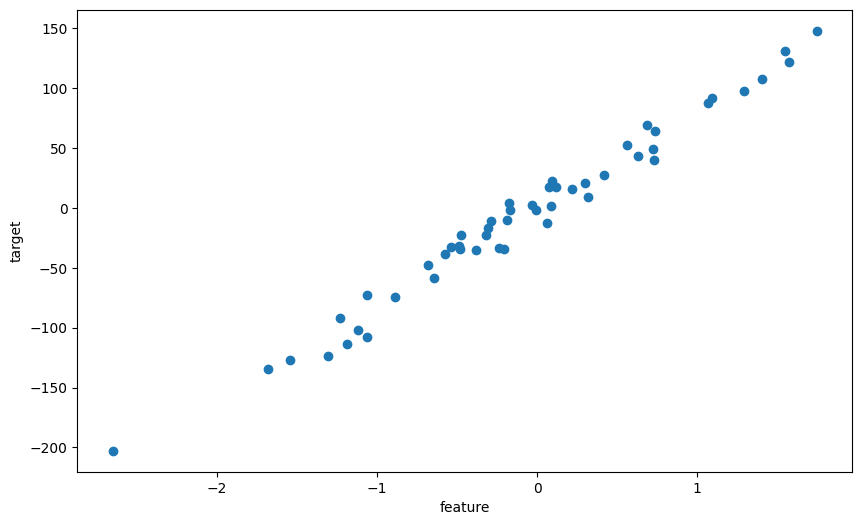

In [35]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

Функция, которую здесь оптимизируем - это MSE, её график для конкретно нашей задачи рисовали выше.

Реализуем две функции:
1. mserror - функция среднеквадратичной ошибки $MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


2. gr_mserror - градиент функции MSE. Распишем его отдельно для коэффициента сдвига и коэффициента наклона:

Сдвиг:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

Наклон:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [36]:
# функция, определяющая среднеквадратичную ошибку
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты, затем на каждом шаге считаем градиент, умножаем его на шаг обучения и вычитаем его из предыдущих значений коэффициентов и так далее пока не поймем, что точки коэффициентов очень похожи друг на друга на соседних итерациях.

In [37]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага (learning rate)
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
# количество итерация 
n = 100
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    # движение в негативную сторону вычисляемого градиента
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}| Следующая точка {next_w1, next_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Итерация: 0
Текущая точка (0, 0)| Следующая точка (13.245106098282543, -1.3921748530551812)
MSE 5436.432058517568
--------------------------------------------------------
Итерация: 1
Текущая точка (13.245106098282543, -1.3921748530551812)| Следующая точка (24.283455474773014, -2.270634896573517)
MSE 3812.4417335187304
--------------------------------------------------------
Итерация: 2
Текущая точка (24.283455474773014, -2.270634896573517)| Следующая точка (33.487719285860635, -2.777322881591963)
MSE 2689.1325642433894
--------------------------------------------------------
Итерация: 3
Текущая точка (33.487719285860635, -2.777322881591963)| Следующая точка (41.166652649401456, -3.0191730536904307)
MSE 1910.2491839412482
--------------------------------------------------------
Итерация: 4
Текущая точка (41.166652649401456, -3.0191730536904307)| Следующая точка (47.57624618267611, -3.0762482285482444)
MSE 1368.9634120527255
--------------------------------------------------------
Итерац

А мы получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

Сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [38]:
print('Коэффициенты наклона', end=' ')
print(f'True {coeffs}, trained {next_w1}')

print('Коэффициенты сдвига', end=' ')
print(f'True 0, trained {next_w0}')

Коэффициенты наклона True 80.65667909277211, trained 80.41811391254866
Коэффициенты сдвига True 0, trained 0.18151025367739462


А они очень похожи.

А визуализированные кривые наслаиваются друг на друга

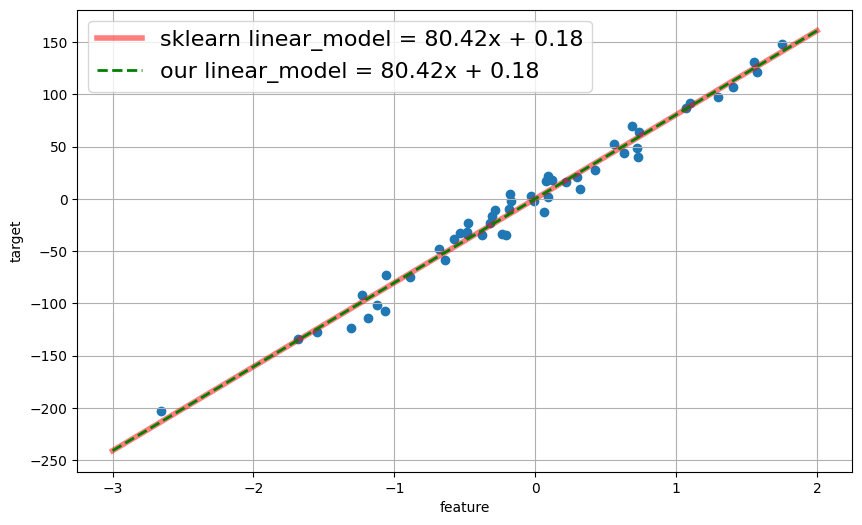

In [39]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
our_model_y = next_w1 * x + next_w0

plt.plot(x, model_y_sk, linewidth=4, alpha=0.5, c='r', label=f'sklearn linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.plot(x, our_model_y, '--g', linewidth=2, label=f'our linear_model = {next_w1:.2f}x + {next_w0:.2f}')
plt.scatter(X, y) 
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

## Многомерная линейная регрессия

Сейчас мы посмотрели на то, как обучается линейная регрессия для задач с одним признаком.

Построим себе данные поинтересней, состоящие из 4 признаков, это уже отрисовать не сможем.



In [40]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=4, n_informative=4,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

### Из sklearn

Обучим для начала модель из `sklearn`

In [41]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Посмотрим обученные коэффициенты и теперь давайте их называть весами.

Есть веса при признаках - это и есть коэффициенты наклона но по каждой оси.

И есть один свободный вес - коэффициент сдвига.

Получаем 4 веса при признаках - значения для каждого признака, которые сообщают, насколько нужно наклонить прямую относительно каждой оси.

И один сдвиг - свободный вес.

In [42]:
model.coef_, model.intercept_

(array([59.51225616, 57.72556421, 44.70715115, 24.87193091]),
 -1.6392969526147305)

Можем сделать предсказания этой моделью, сначала через метод `predict`.

In [43]:
model.predict(X[:1])

array([37.14897504])

А теперь с помощью перемножения весов на признаки, суммирования их и добавления свободного веса.

In [44]:
np.sum(model.coef_ * X[0]) + model.intercept_

37.148975042692896

Давайте посчитаем ошибку на предсказаниях модели, при этом получим предсказания не одним способом (через `model.predict`), а еще и вторым, сами перемножим веса (`model.coef_`) на значения признаков (`X`) и добавим значение сдвига (`model.intercept_`)

Выходит, что неважно, как мы получаем предсказания они всё равно одинаковые.

In [45]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = model.predict(X)
df['pred_dot'] = X.dot(model.coef_) + model.intercept_

df.head()

,0,1,2,3,y,pred_fit,pred_dot
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992


Посчитаем отклонения предсказаний от истины.

In [46]:
df['residual'] = df['pred_fit'] - df['y']
df.head()

,0,1,2,3,y,pred_fit,pred_dot,residual
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975,-6.450099
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654,-3.810959
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486,0.329057
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454,5.058363
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992,6.316763


И на всех объектах считаем метрику MSE - mean squared error, напомню, что более подробно про неё рассказываю в этом [видео](https://youtu.be/vh2smjQyhp8) и в этом [ноутбуке](https://colab.research.google.com/drive/14Oxi6sI25mP4JbovLiJ57e7H5sbN2I3p).

MSE равняется.

In [47]:
np.mean(df['residual'] ** 2)

92.64429127220508

### Своя реализация линейной регрессии

Берем те же самые данные, где брали 4 признака, но еще возвращаем веса при признаках, а свободный вес по умолчанию в такой генерации равен 0.

In [48]:
X, y, coeffs = make_regression(n_samples=50, n_features=4, n_informative=4,
                               noise=10, coef=True, random_state=11)

display(X, y)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

In [49]:
coeffs

array([59.32158596, 58.74342238, 44.07539836, 25.03682142])

Для удобства реализации градиентного спуска от записи поэлементной через сумму ($MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2$) перейдем к матричной форме записи.

Предсказания линейной модели - это перемножение весов на признаки плюс свободный вес.

$$y_{pred} = X\cdot w + w_0$$

При этом очень важно, чтобы соблюдались размерности матрицы $X$ и вектора $w$.
У нас размерности равны

In [50]:
X.shape, coeffs.shape

((50, 4), (4,))

А значит, чтобы объеты могли матрично перемножиться, нужно чтобы количество столбцов первой матрицы было равно количеству строк второй (но у нас не матрица, а вектор).

У нас совпадают, так что можем их перемножать и получаем ничто иное, как *скалярное произведение* - все значения в признаках перемножаются на соответсвующие веса и складываются.


А значит можем переписать формулу:
$$y_{pred} = \langle X, w\rangle + w_0$$


Но вот только мешается свободный вес. Можно пойти на одну хитрость и добавить фиктивный признак в данные, который для каждого объекта равен 1.



In [51]:
X = np.column_stack([X, np.ones((50))])
X

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699,  1.        ],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ,  1.        ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ,  1.        ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254,  1.        ],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489,  1.        ],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858,  1.        ],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514,  1.        ],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215,  1.        ],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692,  1.        ],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398,  1.        ],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163,  1.        ],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665,  1.        ],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487,  1.        ],
       [-1.0616544 , -0.68448467, -0.4

И теперь всё предсказание линейной модели будет равняться:

$$y_{pred} = \langle X, w\rangle$$


А наша ошибка MSE преобразиться и будет выглядить следующим образом:

$$MSE = \frac{1}{n}\sum^{n}_{i=1}(y_{i} - \text{y_pred}_i)^{2} = \frac{1}{n}\sum^{n}_{i=1}(y_{i} -  \langle X_i, w\rangle)^{2} =  \frac{1}{n}||Y -  X w||^{2}$$


где используется $L_{2}$ норма:

$$||Y -  X w|| = \sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(y_i-X_iw)^2}$$



Реализуем две функции только уже с матричными операциями:
1. mserror_mat - функция среднеквадратичной ошибки для матриц


2. gr_mserror_mat - градиент функции MSE для матрицы:

$\frac{∂ MSE}{∂ w} = \frac{1 \cdot 2}{n}({Y - Xw}) \cdot-X$



In [52]:
# функция, определяющая среднеквадратичную ошибку
def mserror_mat(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror_mat(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)


И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты. Т.к. у нас 5 признаков (4 настоящих плюс один фиктивный), то будет 5 весов.

In [53]:
# первоначальное точка
weights = np.zeros(X.shape[1])
weights

array([0., 0., 0., 0., 0.])

Затем запускаем цикл по обучению и меняем веса, при этом не каждый вес отдельно, а все веса сразу вместе.

И если веса начнут плохо изменяться, то можем выйти по критерию останова:

$$||w_{new} - w_{old}|| ≤ eps$$

In [54]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# размер шага (learning rate)
learning_rate = 0.1

next_weights = weights
# количество итерация 
n = 100
for i in range(n):
    cur_weights = next_weights

    # движение в негативную сторону вычисляемого градиента
    next_weights = cur_weights - learning_rate * gr_mserror_mat(X, cur_weights, y)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_weights}| Следующая точка {next_weights}")
    print(f"MSE {mserror_mat(X, cur_weights, y)}")
    print("--------------------------------------------------------")
    
    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Итерация: 0
Текущая точка [0. 0. 0. 0. 0.]| Следующая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]
MSE 7901.284047919272
--------------------------------------------------------
Итерация: 1
Текущая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]| Следующая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]
MSE 5491.413352110748
--------------------------------------------------------
Итерация: 2
Текущая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]| Следующая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]
MSE 3846.369420368778
--------------------------------------------------------
Итерация: 3
Текущая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]| Следующая точка [34.38479911 26.29452131 22.40202941 10.84471509 -2.06001325]
MSE 2714.9929661406427
--------------------------------------------------------
Итерация: 4
Текущая точка [34.38479911 26.29452131 22.402029

Вышли раньше из обучения, т.к. веса перестали сильно изменяться и мы стали топтаться на одном месте.

И получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

И давайте сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [55]:
print('Веса при признаках')
print(f'True {coeffs},\nTrained {next_weights[:-1]}')

print('\nВес свободный', end=' ')
print(f'True 0, trained {next_weights[-1]}')

Веса при признаках
True [59.32158596 58.74342238 44.07539836 25.03682142],
Trained [59.51242524 57.72548719 44.70646353 24.87225898]

Вес свободный True 0, trained -1.6396678387172885


## Метрики качества линейной регрессии

В задачах машинного обучения мы хотим сравнивать несколько моделей машинного обучения и выбирать наилучшую из них. Решение о том, какая модель хорошая, а какая плохая, принимается на основе одной или нескольких *метрик* моделей машинного обучения.

Без метрик обучение моделей вообще теряет всякий смысл – как же определить, какая из зоопарка обученных моделек хорошая, а какая плохая? Давайте разберёмся, как определить лучшую модель с помощью математики

Интуиция за метриками стоит очень простая – давайте как-нибудь усредним отклонения по всем точкам и получим одно число – метрику качества линейной регрессии, т.е. насколько модель отклоняется от реальных данных.

Метрики принимают на вход два вектора, предсказания модели и истинные значения, после чего вычисляют по этим векторам качество модели.

Сначала загрузим данные эксперимента

In [56]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

features, y = make_regression()


reg = LinearRegression().fit(features, y)

Теперь получим два вектора – предказанное значение $\hat{y}$ и  истинное значение $y$:

In [57]:
y_pred = reg.predict(features) # предсказанное значение
y_true = y # истинное значение

Теперь посмотрим, какие функции можно применять к этим двум наборам точек

## Mean absolute error

Для оценки качества регрессии можно использовать среднюю абсолютную ошибку

In [58]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    reg.predict(features), y)
)

MAE = 2.843325574986011e-13


*Mean Absolute Error* - это просто сумма отклонений истинных значений $y$ от предсказаний нашей модели:

$$
\text{absolute error} = |y_1 - \hat{y}_1| + |y_2 - \hat{y}_2| + \ldots
$$

А потом мы эту сумму делим на количество точек - получаем среднюю ошибку

Метрика принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

## MSE

Mean Squared Error (MSE) - это базовая метрика для определения качества линейной регрессии

Для каждого предсказанного значения $\hat{y}_i$ мы считаем квадрат отклонения от фактического значения и считаем среднее по полученным величинам

In [59]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)

print('MSE = %s' % mse)

MSE = 1.2174295501632286e-25


В целом логика та же, что в *MAE*, только усреднять мы будем квадраты ошибок 
$$
\text{absolute error} = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots
$$

Эта метрика тоже принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

Эта ошибка визуально похожа на  *MSE*, но на графике видно, что *MAE*(красная линия) почти всегда меньше по значению, чем MSE (синяя линия). Это значит, что *MSE* более "пессимистична" и сильнее штрафует за большие ошибки - т.е. MSE лучше применять, когда вы уверены что в выборке нет "выборосов" (англ. outliers) - значений, который очень сильно отличаются от остальных точек. В этом случае MSE может быть очень плохой, а на деле ситуация приемлема. Если выбросы есть, лучше применять MAE.

![rmse_vs_mae](https://248006.selcdn.ru/public/Data-science-4/img/rmse_vs_mae.png)

## $R^2$ (коэффициент детерминации)

Название - *coefficient of determination*. Наилучшее возможное значение 1.0, чем меньше тем хуже. Если этот коэффициент близок к 1, то условная дисперсия модели (то есть разброс предсказаний модели $\hat{y}$ относительно разброса самой целевой переменной $y$ ) достаточно мала - то есть модель неплохо описывает данные. Коэффициент может быть даже отрицательным - то это значит, что модель совсем уж плохая.

Эта метрика хороша тем, что она *нормализована*, то есть не превышает единицу - удобно сравнивать разные модели. Например, метрика $MSE$ может принимать ничем не ограниченные значения больше нуля - это не всегда удобно.

В библиотеке *sklearn* есть готовая реализация этой метрики.

In [60]:
from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

r2_score = 1.0


Про другие ошибки можно почитать в [официальной документации](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) в разделе про метрики регрессии.

## Логистическая регрессия

`Логистическая регрессия = sigmoid(linear_regression) = вероятности предсказания по классам`

In [61]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)

X, y

(array([[-0.86305361],
        [-1.4372011 ],
        [ 0.19592225],
        [-0.87164985],
        [ 0.00982831],
        [ 1.30282593],
        [ 0.16134434],
        [-0.9223264 ],
        [-0.10173176],
        [ 0.41006497],
        [ 0.27129997],
        [-0.71111212],
        [-2.98259876],
        [-0.09300387],
        [ 0.82285659],
        [ 0.16493473],
        [-0.40806382],
        [ 0.62136283],
        [ 0.76258897],
        [-0.11001122],
        [-1.26261842],
        [ 0.04513441],
        [ 0.50026937],
        [-0.6784482 ],
        [ 0.2182344 ]]),
 array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1]))

In [62]:
model_lr = LinearRegression().fit(X, y)

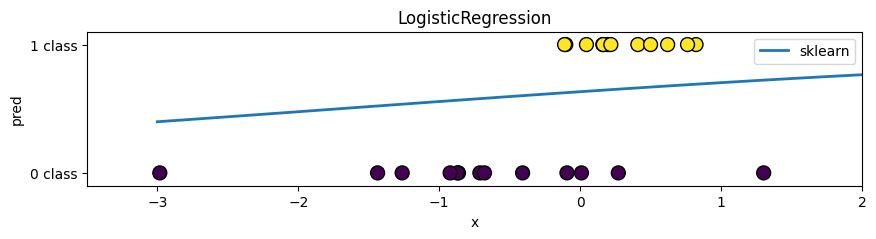

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-3, 3, num=100)
model_lr_a, model_lr_b = model_lr.coef_, model_lr.intercept_
model_lr_y = model_lr_a * x + model_lr_b

plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_lr_y), linewidth=2, label='sklearn')
plt.scatter(X, y, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('LogisticRegression')
plt.legend();

In [64]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [65]:
model = LogisticRegression().fit(X, y)
model.predict(X[:2])



/Users/pakorolev/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [66]:
model.predict_proba(X[:2, :])


array([[9.81813537e-01, 1.81864490e-02, 1.43884301e-08],
       [9.71751811e-01, 2.82481591e-02, 3.00932288e-08]])

### Метрики задачи классификации



После отбра признаков, выбора и, конечно, реализации модели и получения некоего результата в виде класса или вероятности принадлежности к классу, следующим шагом будет выяснение того, насколько эффективна модель.

### Матрица ошибок (Confusion Matrix)

Матрица ошибок - одна из интуитивно понятных метрик, используемых для определения точности модели. Она используется для задачи классификации, где выходные данные могут быть двух или более классов. 

Возьмем два примера с, абстрактно, двумя классами - "плохой" и "хороший" - и подумаем, что в каждом конкретном случае для нас будет важнее предсказать.

1. Предположим, что мы решаем задачу классификации, где предсказываем, болен человек или нет: *1*, если болен, и *0*, если здоров. Скажем, из 100 человек только 5 больны. Так как больных всего 5% от общего числа людей, то даже очень плохая модель (прогнозирование всех как здоровых) даст нам точность в 95% - это частая проблема для данных с несбалансированными классами. Поэтому в этом случае мы хотим правильно классифицировать всех больных людей - если здоровые будут отнесены к больным, то в данном случае это повлечет за собой явно меньше неприятностей.

2. Теперь давайте представим, что нам надо классифицировать, является ли электронное письмо спамом или нет. Присвоим метку *1*, если это спам, и *0*, если не является спамом. Предположим, что модель классифицировала важное письмо, которого вы отчаянно ждете, как *спам*. В этой ситуации это может быть довольно трагично, ведь в письме может находиться важная информация. Соответственно, в задаче классификации электронных писем более важно минимизировать количество объектов, отнесенных к классу "плохой".

Оба этих случая могут быть исследованы с помощью матрицы ошибок, элементы которой как раз таки указывают на ошибочную классификацию в первом и во втором примере. 

Матрица ошибок представляет собой таблицу с двумя измерениями - {"Actual", "Predicted"}, каждое из которых представлено множеством прогнозируемых классов. Фактические результаты - это столбцы, а прогнозируемые - строки.

![](https://248006.selcdn.ru/public/DS_Block2_M6_final/conf_mtrx.png)

Сама по себе матрица ошибок не является показателем производительности как таковым, однако почти все метрики (Recall, Precision, Accuracy, AUC-ROC Curve) основаны на значениях внутри нее.

Теперь давайте разберемся в терминах матрицы ошибок: что означают все ее атрибуты TP, TN, FP и FN?

![](https://248006.selcdn.ru/public/DS_Block2_M6_final/terms.png)

Итак,
- *True Positives (TP)*: Фактический класс объекта был *1 (True)* и прогнозируемый также *1 (True)*
- *True Negatives (TN)*: Фактический класс объекта был *0 (False)* и прогнозируемый также *0 (False)*
- *False Positives (FP)*: Фактический класс объекта был *0 (False)*, а прогнозируемый - *1 (True)*. False - потому что модель предсказала неверно, positives - потому что предсказанный класс был положительным
- *False Negatives (FN)*: Фактический класс объекта был *1 (True)*, а прогнозируемый - *0 (False)*. False - потому что модель предсказала неверно, negatives - потому что предсказанный класс был отрицательным

Логично, что идеальным сценарием является получение такой матрицы, в которой модель дает FP == 0 и FN == 0, однако в реальной жизни любая модель в большинстве случаев не будет давать 100% точности.

In [72]:
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X, y = make_classification(n_samples=1800, n_features=2, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_train, y_train)

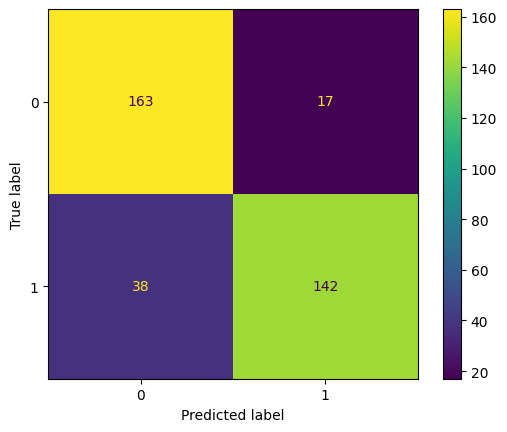

In [68]:
cm = confusion_matrix(y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

Мы знаем, что будет какая-то ошибка в предсказаниях модели и что это будет либо FP, либо FN, но что именно следует минимизировать, зависит исключительно от потребностей бизнеса и контекста проблемы, которую требуется решить. Например, в нашем примере с классификацией больных людей более важно минимизировать FN - нам важнее правильно распознать больных людей, чем ошибочно отнести здоровых к больным. Напротив, в примере со спамом менее важно пропустить надоедливую рекламу, чем важное письмо - здесь нам актуальнее минимизировать FP.

Теперь рассмотрим метрики классификации, основанные на терминах матрицы ошибок.

### Accuracy (доля правильных ответов)

Теперь давайте разберемся с метриками классификации, основанными на матрице ошибок.

Наиболее очевидной мерой качества модели классификации является доля правильных ответов (иногда *accuracy* переводят как *точность*, но этот термин отведен для другой метрики - *precision*) - эту меру мы встречали в предыдущих уроках по классификации, и означает она не что иное, как отношение числа верных прогнозов к общему количеству прогнозов:



![](https://248006.selcdn.ru/public/DS_Block2_M6_final/accuracy.png)

В терминах матрицы ошибок accuracy приобретает вид:

$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$

Доля правильных ответов является хорошей мерой, когда классы сбалансированы или почти сбалансированы - их соотношение в конечной выборке должно быть примерно одинаковым. Например, как в датасете Iris - там данные идеально сбалансированы, поэтому метрика дает точный ответ.

Эта метрика совершенно не подходит в качестве меры, если один из классов явно преобладает над другим. Допустим, мы хотим оценить работу спам-фильтра почты. У нас есть 100 не-спам писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).

Тогда accuracy:

$$
Accuracy = \frac{5 + 90}{5 + 90 + 10 + 5} = 86,4
$$

Однако если мы просто будем предсказывать все письма как не-спам, то получим более высокую accuracy:

$$
Accuracy = \frac{0 + 100}{0 + 100 + 0 + 10} = 90,9
$$


In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.8472222222222222

### Precision, recall

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).



$$
Precision = \frac{TP}{TP + FP}
$$


$$
Recall = \frac{TP}{TP + FN}
$$

`Precision` можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, 

а `Recall` показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

In [70]:
from sklearn.metrics import recall_score

recall_score(y_test, model.predict(X_test))

0.7888888888888889

In [71]:
from sklearn.metrics import precision_score

precision_score(y_test, model.predict(X_test))

0.8930817610062893

### Когда стоит использовать *точность*, а когда *полноту*?

Если мы хотим сосредоточиться на минимизации ложных позитивов (вспомним пример со спамом, где нам накладнее пропустить одно важное письмо, чем получить несколько писем со спамом), мы применяем *точность*, а если нам более важно минимизировать риск пропустить хоть один позитивный результат (а здесь подойдет пример с больными, где нам опаснее получить ложноотрицательный ответ и отнести больного к здоровым), то следует использовать *полноту*.

Также следует отметить, что точность и полнота не зависят от соотношения размеров классов. Даже если объектов одного из классов на порядки больше, данные показатели будут корректно отражать качество работы алгоритма.

## Лаба 3


Найти датасет ( можно посмотреть на [`kaggle`](https://www.kaggle.com/datasets), [PapersWithCode](https://paperswithcode.com/datasets) или [sklearn](https://scikit-learn.org/stable/datasets.html))  и обучить на нем линейную или логистическую регрессию.
